In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("C:/Users/amro6/Downloads/archive (18)/Titanic-Dataset.csv")

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# drop cabin column
df.drop(['Cabin'], axis=1, inplace=True)

In [11]:
# use backward fill
df['Embarked'] = df['Embarked'].bfill()

C:\Users\amro6\AppData\Local\Temp\ipykernel_5008\3143475091.py:2: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(df['Age'], color="green", vertical=False, shade=True)
C:\Users\amro6\AppData\Local\Temp\ipykernel_5008\3143475091.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], color="green", vertical=False, shade=True)


<Axes: xlabel='Age', ylabel='Density'>

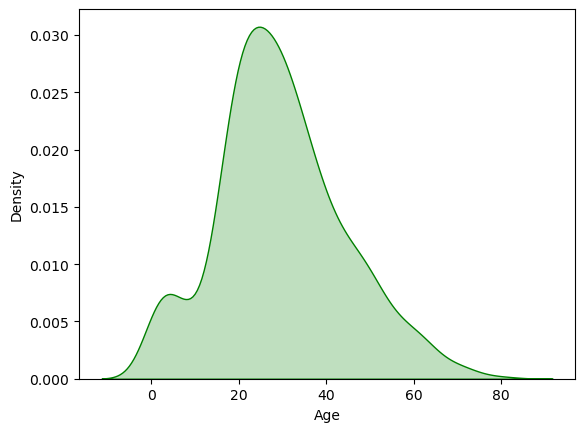

In [12]:
import seaborn as sns
sns.kdeplot(df['Age'], color="green", vertical=False, shade=True)

In [13]:
# inplace by mean 
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.shape

(891, 11)

In [16]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

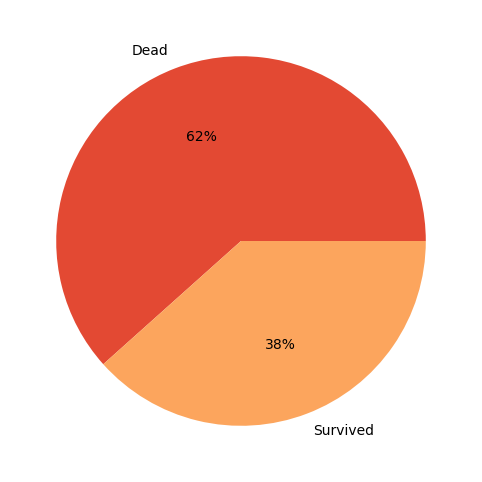

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(12,6))
colors = sns.color_palette('RdYlBu')

plt.pie(df['Survived'].value_counts(), labels = ['Dead', 'Survived'], colors = colors, autopct='%.0f%%')
plt.show()

plt.subplots_adjust(wspace=2,hspace= 10 , right=6 , top = 3)

In [18]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [19]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [20]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.000000,1,0,7.2500,True
1,1,1,38.000000,1,0,71.2833,False
2,1,3,26.000000,0,0,7.9250,False
3,1,1,35.000000,1,0,53.1000,False
4,0,3,35.000000,0,0,8.0500,True
5,0,3,29.699118,0,0,8.4583,True
6,0,1,54.000000,0,0,51.8625,True
7,0,3,2.000000,3,1,21.0750,True
8,1,3,27.000000,0,2,11.1333,False
9,1,2,14.000000,1,0,30.0708,False


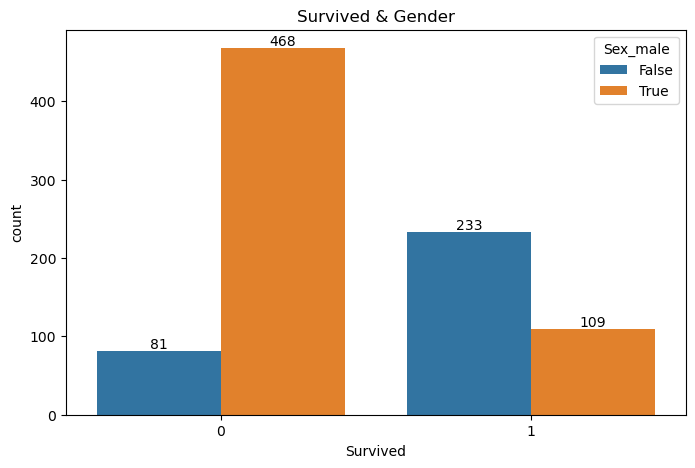

In [21]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Survived', hue='Sex_male', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Survived & Gender")
plt.show()

In [22]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [23]:
df.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Sex_male       bool
dtype: object

# Logistic Regression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report for precision, recall, and F1-score
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



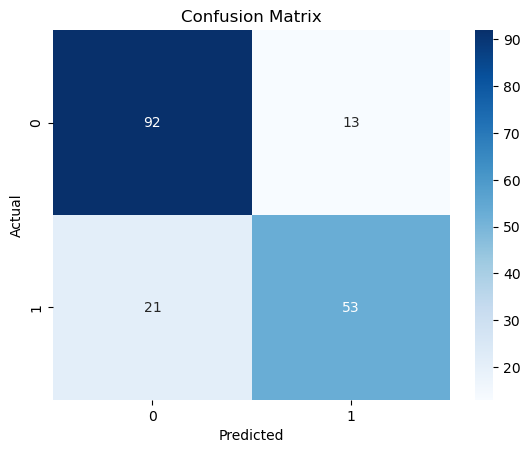

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

In [36]:
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7821229050279329
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



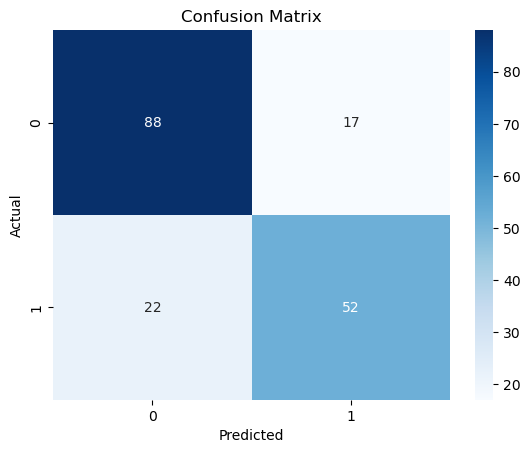

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()